In [23]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('clean_data.csv')
df.head()

,avg_monthly_hrs,dept_id,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,age,gender,marital_status,filed_complaint
0,246.0,D00-OT,0.866838,6,0,medium,0.134415,Left,4.0,42.0,Female,Married,0
1,134.0,D00-OT,0.555718,2,0,low,0.511041,Left,3.0,23.0,Female,Unmarried,0
2,156.0,D00-SS,0.474082,2,0,medium,0.405101,Left,3.0,24.0,Female,Unmarried,1
3,256.0,D00-SP,0.961360,6,0,low,0.152974,Left,4.0,51.0,Female,Married,0
4,146.0,D00-SS,0.507349,2,0,medium,0.434845,Left,3.0,23.0,Female,Unmarried,0


# EDA and analysis on last eval and n_projects

<AxesSubplot:>

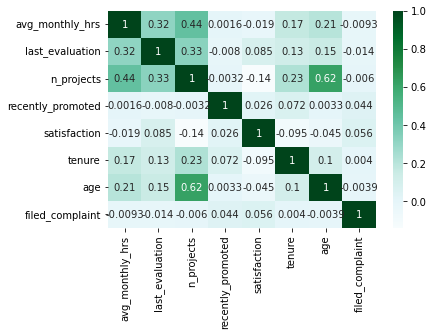

In [27]:
sns.heatmap(df.corr(),cmap="BuGn", annot=True)

Observations:
- Last_evaluation has a mild positive correlation with Tenure
- n_projects has a slightly better but still mild correlation with Tenure
- last evaluation has mild correlation with avg_monthly hours
- n_projects has a higher correlation with last_evaluation (more projects possibly better evaluation)
- n_projects also has medium collrelation with avg_monthly_hrs - indicating greater projects mean greater hours put in
- n_projects infact has the highest correlation with age - indicating older workers typically get more projects

In [45]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
avg_monthly_hrs,14116.0,NaN,NaN,NaN,199.992632,50.826952,49.0,155.0,199.0,245.0,310.0
dept_id,14116,12,D00-SS,3895,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_evaluation,14116.0,NaN,NaN,NaN,0.718322,0.163699,0.316175,0.579516,0.718322,0.856854,1.0
n_projects,14116.0,NaN,NaN,NaN,3.77777,1.249693,1.0,3.0,4.0,5.0,7.0
recently_promoted,14116.0,NaN,NaN,NaN,0.02104,0.143523,0.0,0.0,0.0,0.0,1.0
salary,14116,3,low,6889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
satisfaction,14116.0,NaN,NaN,NaN,0.621322,0.249126,0.040058,0.452826,0.64835,0.82296,1.0
status,14116,2,Employed,10761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,14116.0,NaN,NaN,NaN,3.460541,1.496271,0.0,3.0,3.0,4.0,10.0
age,14116.0,NaN,NaN,NaN,32.896005,9.975,22.0,24.0,29.0,41.0,57.0


Observations:
- The average has mean of .71 with the minimum being .31 and the max being 1
- Typically the average for all teams is a little less than 4 projects with the max being 7 projects

<AxesSubplot:>

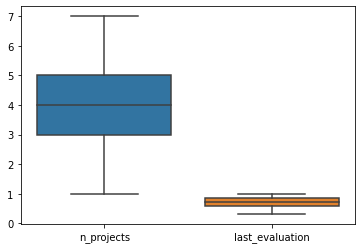

In [19]:
# exploring outliers
sns.boxplot(data = df.loc[:, ['n_projects','last_evaluation']])

Observation:
- We can see that there are no outliers in the data

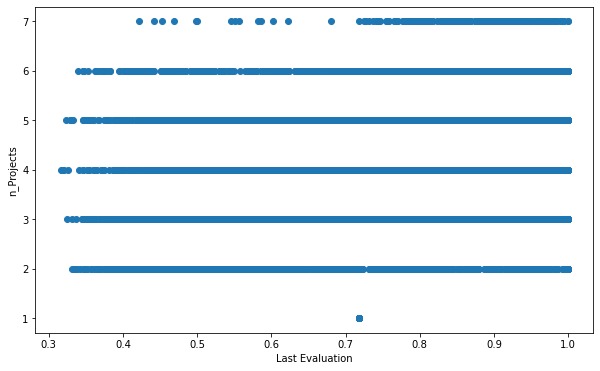

In [29]:
plt.figure(figsize = (10,6))
plt.scatter(df['last_evaluation'], df['n_projects'])
plt.xlabel('Last Evaluation')
plt.ylabel('n_Projects')
plt.show();

Observation:
- Typically people with higher number of projects did not have low evaluation scores

Text(0.5, 0, 'Number of projects')

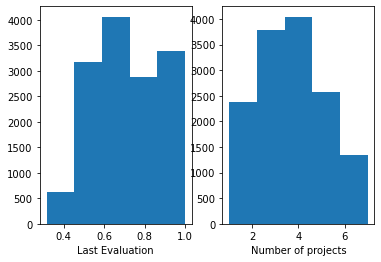

In [47]:
#representing skweness of the data through histogram
plt.subplot(1,2,1)
plt.hist(df['last_evaluation'], bins = 5)
plt.xlabel('Last Evaluation')
plt.subplot(1,2,2)
plt.hist(df['n_projects'], bins = 5)
plt.xlabel('Number of projects')

Observation:
- The last evaluation data is left skewed - most of the data points are clustered to the right of the chart
- The number of projects data is right skewed - least datapoints are towards the left of the chart

Text(0, 0.5, 'Age')

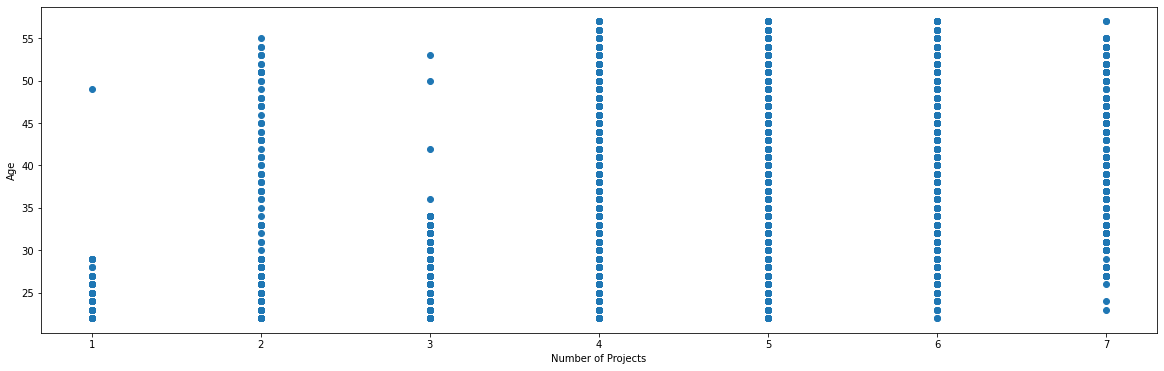

In [40]:
#looking at n_projects with age - which as highest correlation
plt.figure(figsize = (20,6))
plt.scatter(df['n_projects'], df['age'])
plt.xlabel('Number of Projects')
plt.ylabel('Age')

# Discovering patterns in the data

<AxesSubplot:xlabel='last_evaluation', ylabel='n_projects'>

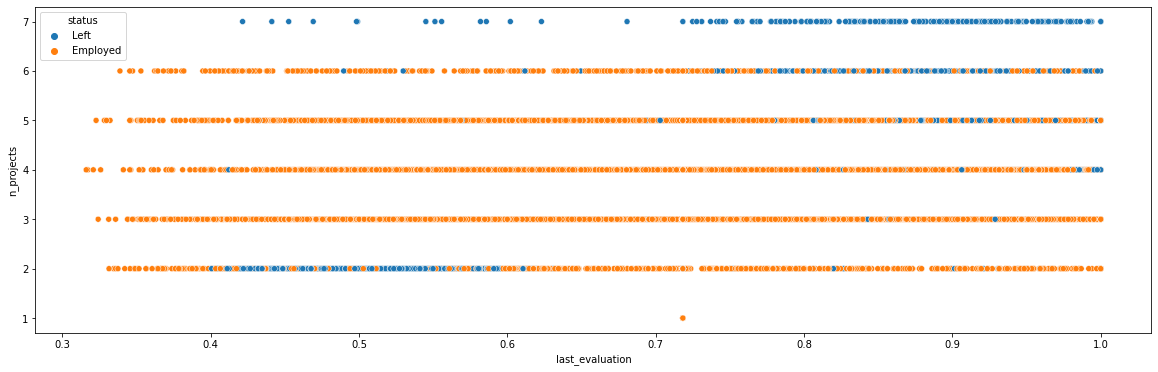

In [51]:
#figuring out the relationship of status with n_projects and last_evaluation
plt.figure(figsize = (20,6))
sns.scatterplot(x = df['last_evaluation'], y = df['n_projects'], hue = df['status'])

Observations:
- Apparently all people who had most projects have left
- At the same time we left clusters who got low evaluation score and burnout on the top right - despite having good evaluation scores
- Typically people working on the average number of projects between 3-5 continue working

<AxesSubplot:xlabel='last_evaluation', ylabel='n_projects'>

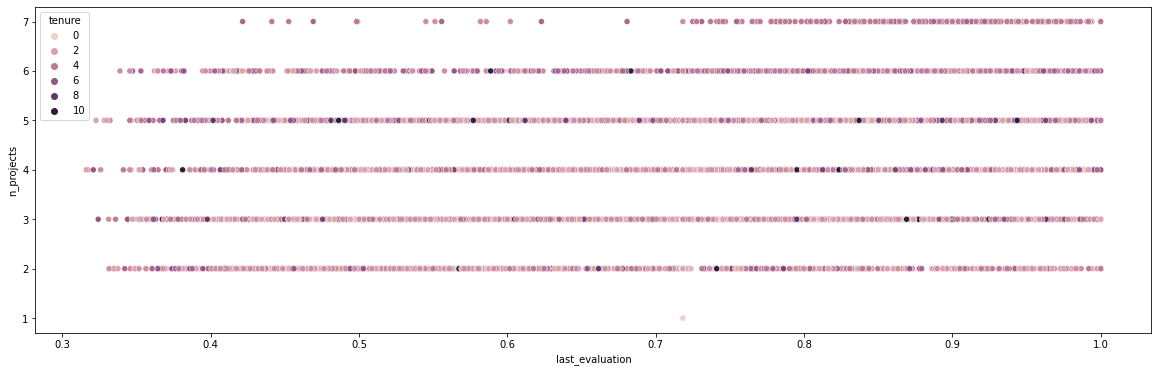

In [52]:
# now doing the same against tenure
plt.figure(figsize = (20,6))
sns.scatterplot(x = df['last_evaluation'], y = df['n_projects'], hue = df['tenure'])

Observations:
- People with high scores but working on higher number of projects stay around only for between 4-6 years
- The highest tenure cluster is typically those with 4-5 projects and high ratings
- However we also see clusters developing around average to low evaluation score people but working on around 5 projects

Male      9287
Female    4829
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='last_evaluation'>

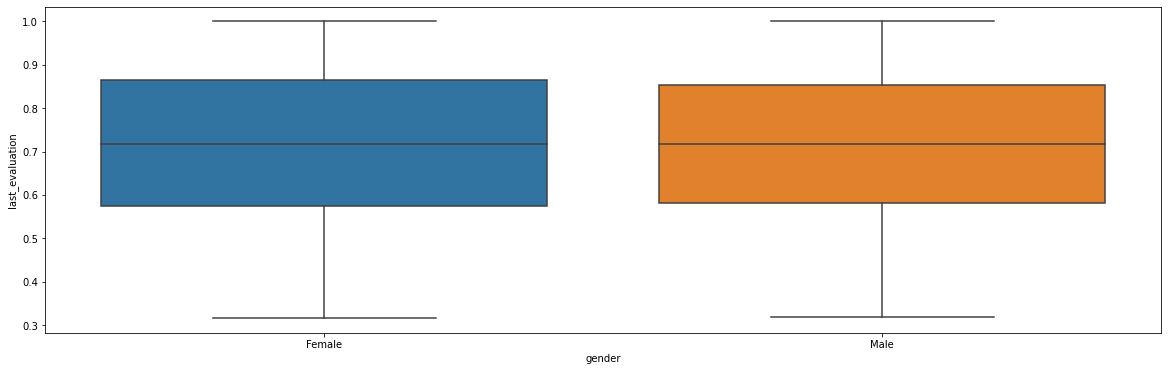

In [58]:
#is there biasness in evaluation of women?
print(df.gender.value_counts())
plt.figure(figsize = (20,6))
sns.boxplot(x= df['gender'], y= df['last_evaluation'], data = pd.melt(df))

Observation:
- There seems to be no biasness, as both the box-plots appear to be near equally proportioned.
- However the interquartile range seems to be larger for women as compared to men.

<AxesSubplot:xlabel='recently_promoted', ylabel='last_evaluation'>

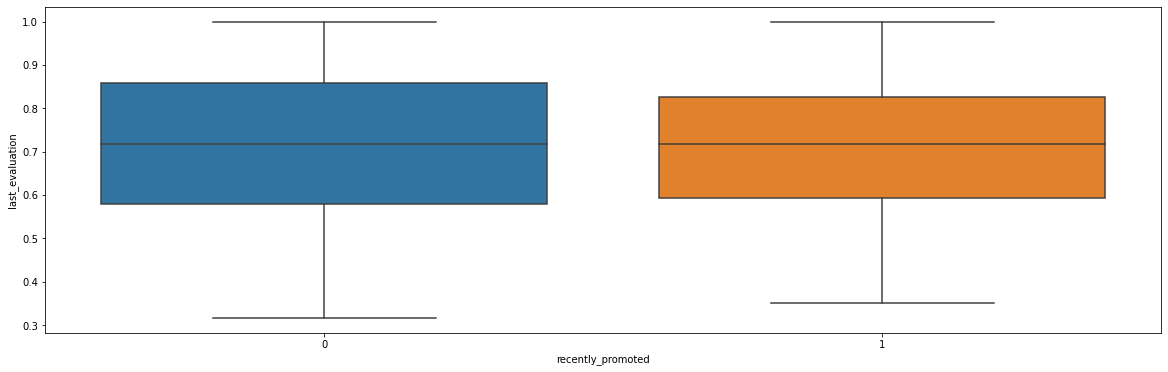

In [59]:
#what is the relationship between promotions and last_evaluation

plt.figure(figsize = (20,6))
sns.boxplot(x= df['recently_promoted'], y= df['last_evaluation'], data = pd.melt(df))

Observation:
- Clearly no apparent relationship - guessing there must be other factors